# info

This script will generate a heatmap of hypoteses A, B and E.

This is due to the following contrasts:
* Hypothesis A: laminar over static
* Hypothesis B is oscillatory over laminar
* Hypothesis C i osicllatory Pi over laminar Pi
* Hypothesis D is laminar Pi over laminar no Pi
* Hypothesis Eis oscillatory Pi over oscillatory no Pi

In [1]:
import os, pandas, numpy, seaborn
import scipy, scipy.stats

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(16, 9)})

In [3]:
colors = [(0, "blue"), (0.5-0.125, "white"), (0.5+0.125, "white"), (1, "red")]
bwwr = matplotlib.colors.LinearSegmentedColormap.from_list("bwwr", colors)

# 0. user-defined variables

In [4]:
DEG_called_folder = '/home/adrian//projects/hegoi/results/subsamples/DEG_filtered/'
expression_file = '/home/adrian/projects/hegoi/results/tpm/DESeq2_TPM_values.tsv'
metadata_file = '/home/adrian/projects/hegoi/metadata/hegoi metadata - hypotheses formatted for filter.tsv'

In [5]:
working_hypotheses = ['A', 'B', 'E']

# 1. read data

## 1.1. read DEG names

In [6]:
file_names = os.listdir(DEG_called_folder)
file_names.sort()

working_file_names = []
for file_name in file_names:
    for working_hypothesis in working_hypotheses:
        if working_hypothesis in file_name:
            working_file_names.append(file_name)

# get all DEGs
gene_list = []
for file_name in working_file_names:
    path = DEG_called_folder + file_name
    #print(path)
    df = pandas.read_csv(path)
    print(file_name, df.shape)
    genes = df['ENSEMBL'].to_list()
    for gene in genes:
        gene_list.append(gene)
DEGs = list(set(gene_list))
print('Detected {} DEGs'.format(len(DEGs)))
    

annotateddf_hypothesis_A_down.tsv (302, 9)
annotateddf_hypothesis_A_up.tsv (172, 9)
annotateddf_hypothesis_B_down.tsv (302, 9)
annotateddf_hypothesis_B_up.tsv (194, 9)
annotateddf_hypothesis_E_down.tsv (9, 9)
annotateddf_hypothesis_E_up.tsv (2, 9)
Detected 793 DEGs


## 1.2. read expression

In [7]:
expression = pandas.read_csv(expression_file, sep='\t', index_col=0)
print(expression.shape)
expression.head()

(40320, 26)


Lam153    Lami154      Lami46      Lami94    LamiP109  \
ENSG00000000003  24.240953  20.242011   22.919919   15.438227   18.098457   
ENSG00000000005   0.062960   0.000000    0.000000    0.000000    0.000000   
ENSG00000000419  59.982918  62.984443  120.871295  138.059565  115.707396   
ENSG00000000457   4.680221   3.684855    1.989328    3.244174    4.417648   
ENSG00000000460   1.982690   1.344508    1.422365    1.667403    0.570064   

                  LamiP153    LamiP154    LamiP176    LamiPi46    LamiPi94  \
ENSG00000000003  29.000777   14.784503   11.903633   26.217884   18.455471   
ENSG00000000005   0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000000419  84.892000  172.643218  147.901176  145.183145  135.750959   
ENSG00000000457   2.189278    6.217483    3.998143    4.786793    2.949599   
ENSG00000000460   2.856698    0.416009    0.000000    1.310974    1.812507   

                 ...   OsciP154    OsciP175   OsciP178    OsciPi46    Stat109  \
ENSG00000000003  ...  38.756393   15.976121  21.649331   28.426877  29.688663   
ENSG00000000005  ...   0.000000    0.000000   0.000000    0.000000   0.000000   
ENSG00000000419  ...  98.473591  161.024012  86.023654  115.321222  64.464680   
ENSG00000000457  ...   3.012943    1.024624   2.255165    2.967113   1.825466   
ENSG00000000460  ...   5.510741    3.805323   1.489214    0.957885   4.467578   

                   Stat153    Stat154    Stat176     Stat46     Stat94  
ENSG00000000003  29.207002  28.989493  28.832380  34.600089  27.971771  
ENSG00000000005   0.000000   0.000000   0.013958   0.000000   0.139231  
ENSG00000000419  81.686544  84.388415  88.740844  81.992995  97.987628  
ENSG00000000457   2.371161   3.513856   2.617785   2.546863   2.668982  
ENSG00000000460   5.425887   7.680067   4.002537   3.650609   4.056977  

[5 rows x 26 columns]

In [8]:
log2tpmPO = numpy.log2(expression + 1)
log2tpmPO.head()

Lam153   Lami154    Lami46    Lami94  LamiP109  LamiP153  \
ENSG00000000003  4.657694  4.408848  4.580141  4.038983  4.255384  4.906928   
ENSG00000000005  0.088088  0.000000  0.000000  0.000000  0.000000  0.000000   
ENSG00000000419  5.930333  5.999649  6.929215  7.119559  6.866752  6.424452   
ENSG00000000457  2.505947  2.228005  1.579821  2.085484  2.437667  1.673230   
ENSG00000000460  1.576614  1.229285  1.276416  1.415436  0.650823  1.947366   

                 LamiP154  LamiP176  LamiPi46  LamiPi94  ...  OsciP154  \
ENSG00000000003  3.980437  3.689705  4.766483  4.282104  ...  5.313115   
ENSG00000000005  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
ENSG00000000419  7.439982  7.218211  7.191633  7.095407  ...  6.636242   
ENSG00000000457  2.851496  2.321392  2.532764  1.981706  ...  2.004661   
ENSG00000000460  0.501830  0.000000  1.208501  1.491857  ...  2.702822   

                 OsciP175  OsciP178  OsciPi46   Stat109   Stat153   Stat154  \
ENSG00000000003  4.085435  4.501397  4.879063  4.939634  4.916811  4.906385   
ENSG00000000005  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ENSG00000000419  7.340064  6.443336  6.861971  6.032645  6.369581  6.415968   
ENSG00000000457  1.017654  1.702731  1.988089  1.498489  1.753246  2.174361   
ENSG00000000460  2.264633  1.315690  0.969296  2.450902  2.683896  3.117706   

                  Stat176    Stat46    Stat94  
ENSG00000000003  4.898807  5.153809  4.856576  
ENSG00000000005  0.019998  0.000000  0.188060  
ENSG00000000419  6.487693  6.374918  6.629176  
ENSG00000000457  1.855107  1.826544  1.875380  
ENSG00000000460  2.322660  2.217420  2.338275  

[5 rows x 26 columns]

## 1.3. read metadata

In [9]:
metadata = pandas.read_csv(metadata_file, sep='\t')
metadata.head()

hypothesis  patient  sampleA  sampleB
0  hypothesis_A       46   Stat46   Lami46
1  hypothesis_A      153  Stat153   Lam153
2  hypothesis_A      154  Stat154  Lami154
3  hypothesis_A       94   Stat94   Lami94
4  hypothesis_B       46   Lami46   Osci46

In [10]:
samples = []
for working_hypothesis in working_hypotheses:
    label = 'hypothesis_{}'.format(working_hypothesis)
    
    sub = metadata[metadata['hypothesis'] == label]
    
    samplesA = sub['sampleA'].to_list()
    samplesB = sub['sampleB'].to_list()
    both = samplesA + samplesB
    
    for element in both:
        samples.append(element)
    
working_samples = list(set(samples))

# 2. build the heatmap

In [11]:
print(log2tpmPO.shape)
block = expression.loc[DEGs, working_samples]
print(block.shape)
block.head()

(40320, 26)
(793, 16)


OsciP153     Stat94    Stat153     Lami46    Lami154  \
ENSG00000145386   3.663222  10.683390  27.737140   3.141688   3.094294   
ENSG00000139263   2.738560  38.945520  22.569930   4.567011   6.889963   
ENSG00000134970  24.235450  18.205370  35.269820  23.277600  56.501060   
ENSG00000156970   5.357850   8.664172  14.901210   0.995238   1.565767   
ENSG00000157404   0.825609  11.945900   6.305959   2.198585   0.247453   

                   Osci154    Osci109     Stat46   OsciP154    Osci153  \
ENSG00000145386   5.134586   7.864536  18.060980   6.942392   7.392040   
ENSG00000139263  16.837830   5.822682  23.514890   7.881584  11.411560   
ENSG00000134970  26.883470  20.192600  34.737140  13.726530  27.377470   
ENSG00000156970   3.722222   2.885986   8.498661   4.043360   4.115173   
ENSG00000157404  17.011790   4.127859   5.680353   7.248145  12.019540   

                    Lami94    Stat154   OsciPi46   OsciP109     Osci46  \
ENSG00000145386   3.621672  27.416720   2.319777  10.585170   4.912971   
ENSG00000139263   6.010466  30.577860   3.878924   8.901707   8.571269   
ENSG00000134970  24.385670  30.228750  20.353110  21.988640  40.114240   
ENSG00000156970   1.498971  16.943410   3.154608   5.860843   2.757618   
ENSG00000157404   0.041789   8.867518   2.055199  10.389210   3.839874   

                    Lam153  
ENSG00000145386   4.131039  
ENSG00000139263   6.849716  
ENSG00000134970  72.754410  
ENSG00000156970   0.395558  
ENSG00000157404   0.301059

In [12]:
gene_means = numpy.mean(block, axis='columns')
gene_means

ENSG00000145386     9.168851
ENSG00000139263    12.873092
ENSG00000134970    30.639458
ENSG00000156970     5.335040
ENSG00000157404     5.819115
                     ...    
ENSG00000139531    13.564768
ENSG00000173597    31.346274
ENSG00000272398     6.049094
ENSG00000268297     1.986340
ENSG00000281518     0.819240
Length: 793, dtype: float64

In [13]:
zscore_df = scipy.stats.zscore(block, axis=1)
zscore_df.head()

OsciP153    Stat94   Stat153    Lami46   Lami154   Osci154  \
ENSG00000145386 -0.692293  0.190442  2.334828 -0.757872 -0.763831 -0.507280   
ENSG00000139263 -0.983474  2.530117  0.940999 -0.806038 -0.580614  0.384746   
ENSG00000134970 -0.435475 -0.845523  0.314867 -0.500609  1.758600 -0.255409   
ENSG00000156970  0.004927  0.719085  2.066271 -0.937388 -0.814155 -0.348365   
ENSG00000157404 -1.014559  1.244813  0.098915 -0.735604 -1.132026  2.274079   

                  Osci109    Stat46  OsciP154   Osci153    Lami94   Stat154  \
ENSG00000145386 -0.164008  1.118121 -0.279961 -0.223421 -0.697518  2.294537   
ENSG00000139263 -0.684185  1.032700 -0.484385 -0.141830 -0.665962  1.718104   
ENSG00000134970 -0.710391  0.278644 -1.150086 -0.221817 -0.425260 -0.027928   
ENSG00000156970 -0.528990  0.683335 -0.279000 -0.263489 -0.828582  2.507382   
ENSG00000157404 -0.343622 -0.028193  0.290344  1.259775 -1.173812  0.619361   

                 OsciPi46  OsciP109    Osci46    Lam153  
ENSG00000145386 -0.861221  0.178092 -0.535146 -0.633468  
ENSG00000139263 -0.872811 -0.385391 -0.417457 -0.584520  
ENSG00000134970 -0.699476 -0.588259  0.644289  2.863834  
ENSG00000156970 -0.470969  0.113572 -0.556717 -1.066917  
ENSG00000157404 -0.764736  0.928532 -0.402134 -1.121135

In [14]:
top = numpy.max(numpy.max(zscore_df, axis=1))
bottom = numpy.min(numpy.min(zscore_df, axis=1))

print(top, bottom)

3.7740328300911674 -2.2875960934804493


working with complete and cosine...
working with complete and euclidean...
working with complete and correlation...
working with complete and braycurtis...
working with complete and chebyshev...
working with complete and seuclidean...
working with complete and minkowski...
working with complete and sqeuclidean...
working with single and cosine...
working with single and euclidean...
working with single and correlation...
working with single and braycurtis...
working with single and seuclidean...
working with single and sqeuclidean...
working with average and cosine...
working with average and euclidean...
working with average and correlation...
working with average and braycurtis...
working with average and chebyshev...
working with average and seuclidean...
working with average and minkowski...


/home/adrian/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:805: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(figsize=figsize)


working with average and sqeuclidean...
working with ward and cosine...
working with ward and euclidean...
working with ward and correlation...
working with ward and braycurtis...
working with ward and chebyshev...
working with ward and seuclidean...
working with ward and minkowski...
working with ward and sqeuclidean...
working with weighted and cosine...
working with weighted and euclidean...
working with weighted and correlation...
working with weighted and braycurtis...
working with weighted and chebyshev...
working with weighted and seuclidean...
working with weighted and minkowski...
working with weighted and sqeuclidean...
working with centroid and cosine...
working with centroid and euclidean...
working with centroid and correlation...
working with centroid and braycurtis...
working with centroid and chebyshev...
working with centroid and seuclidean...
working with centroid and minkowski...
working with centroid and sqeuclidean...
working with median and cosine...
working with 

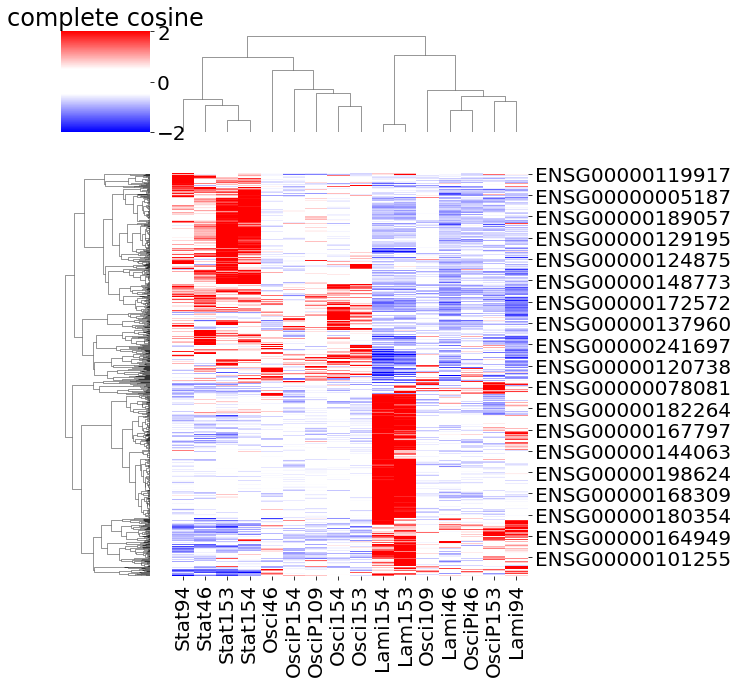

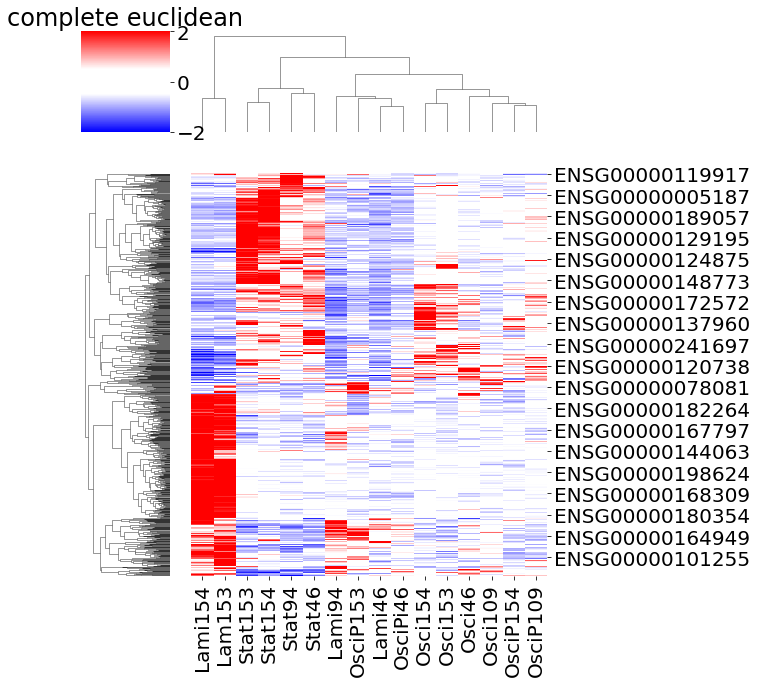

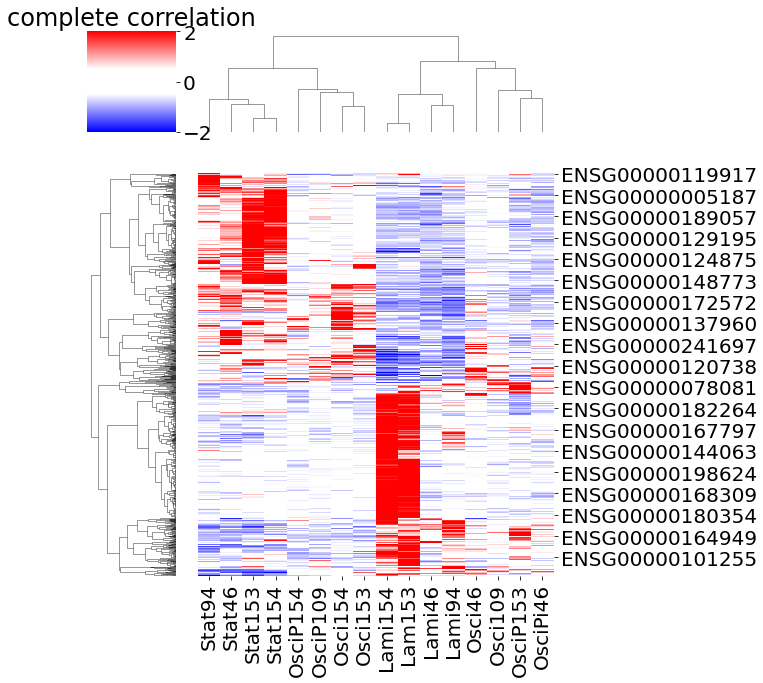

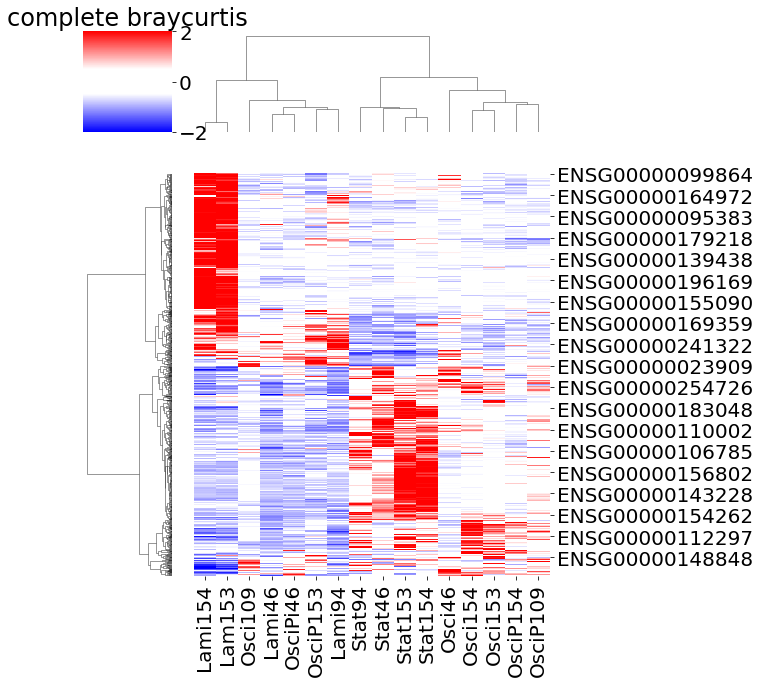

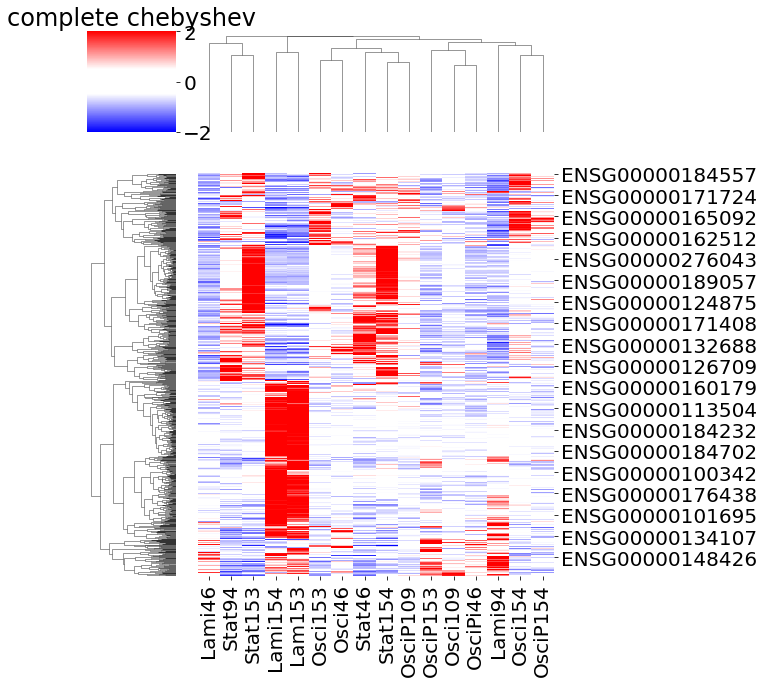

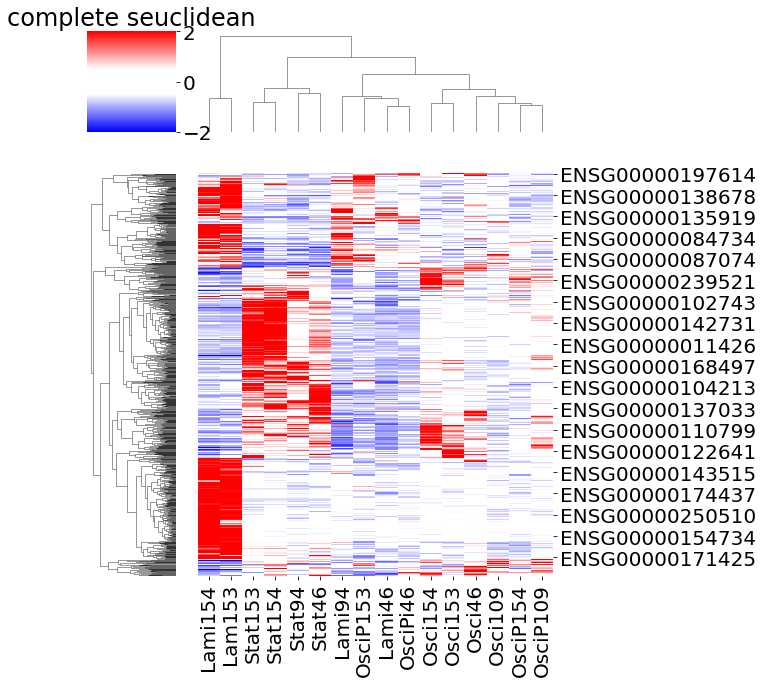

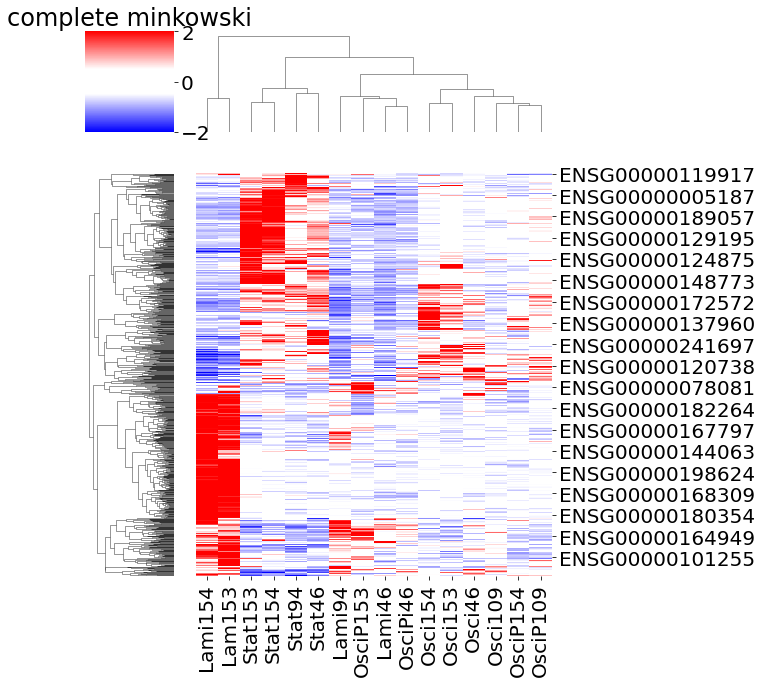

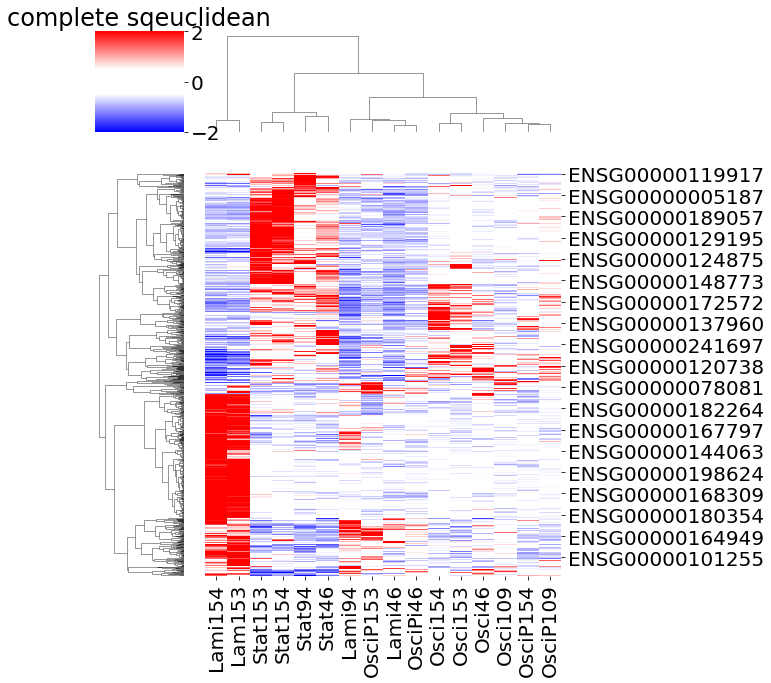

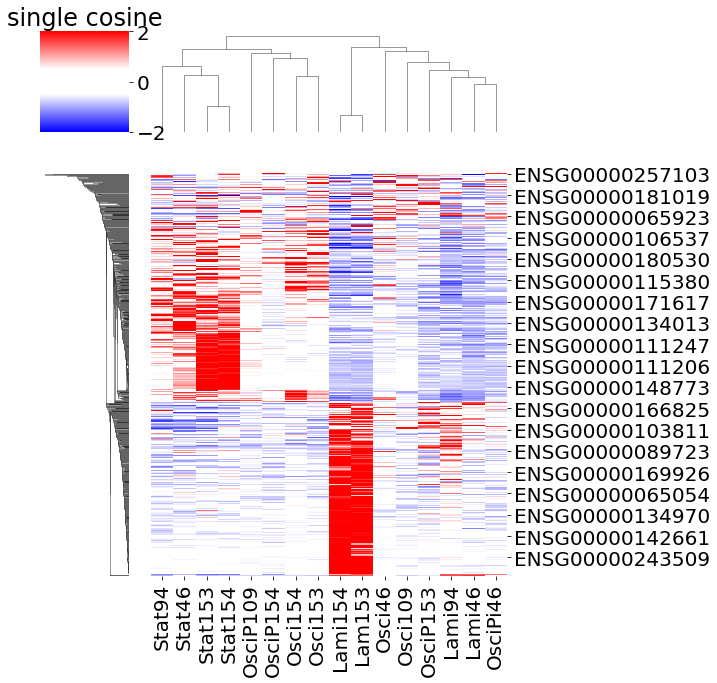

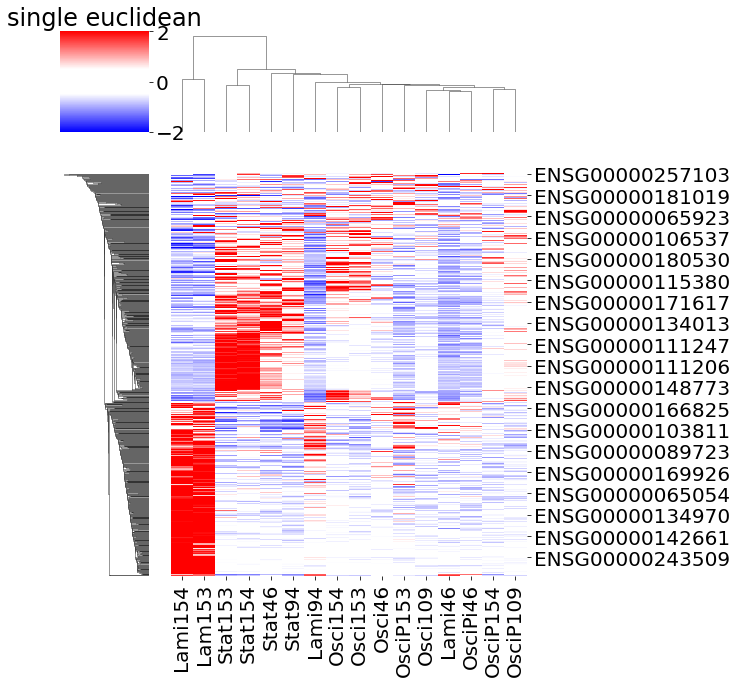

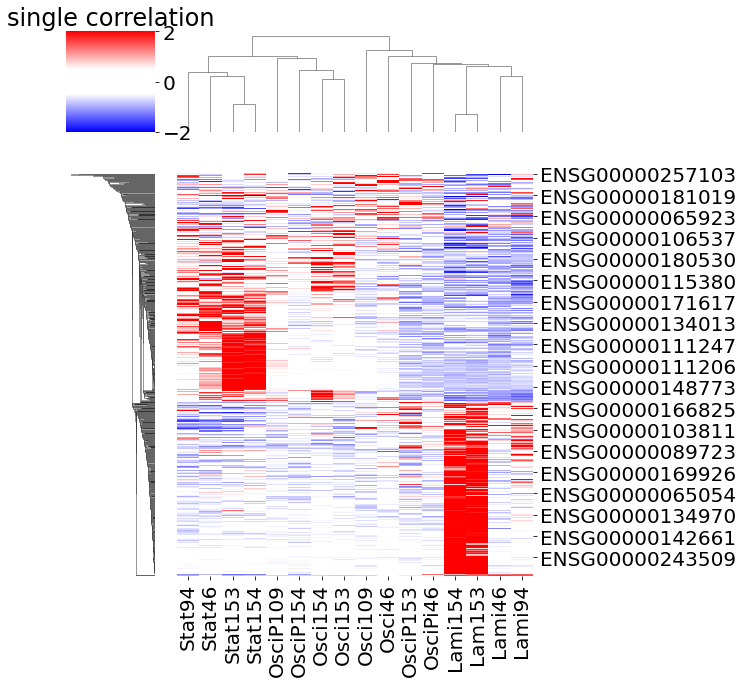

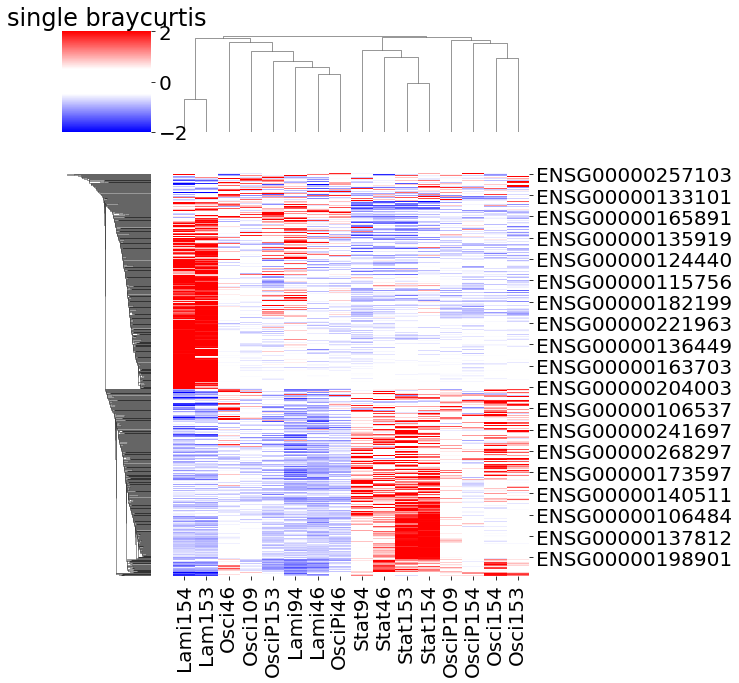

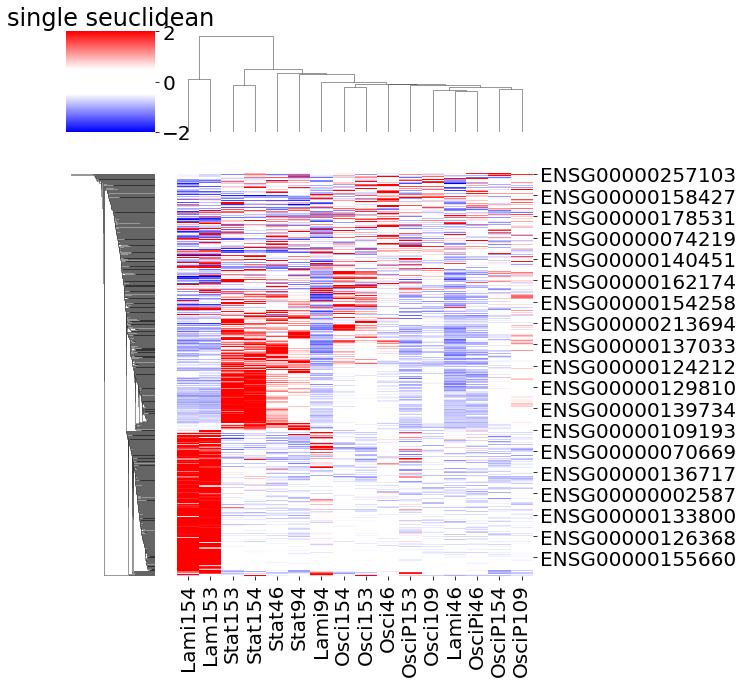

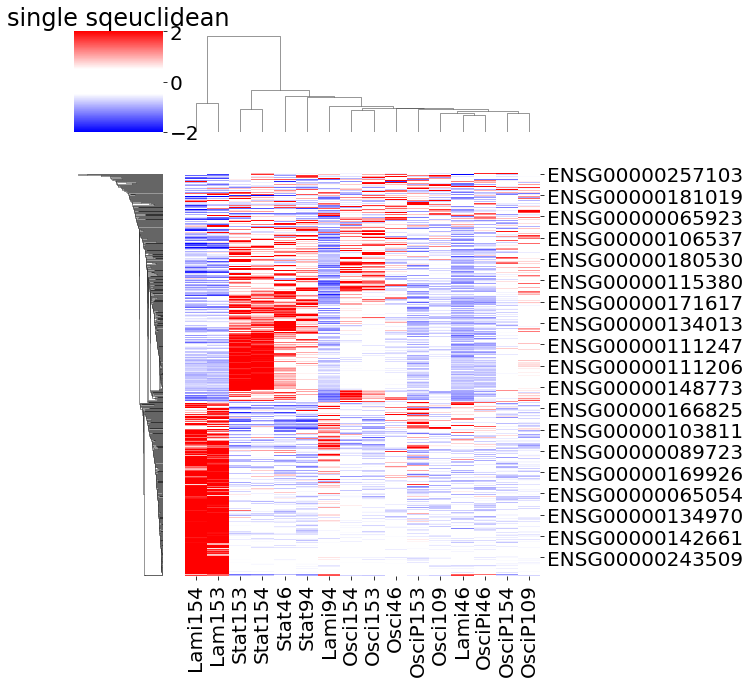

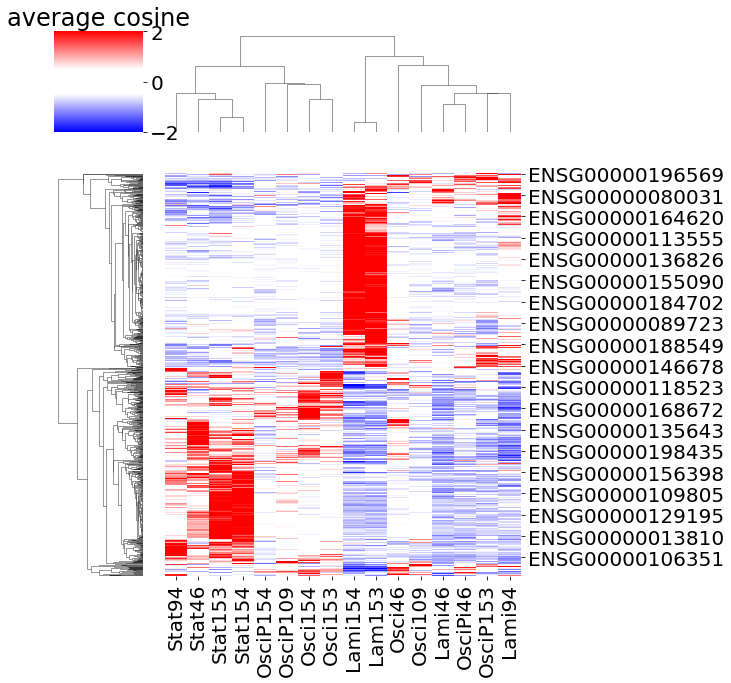

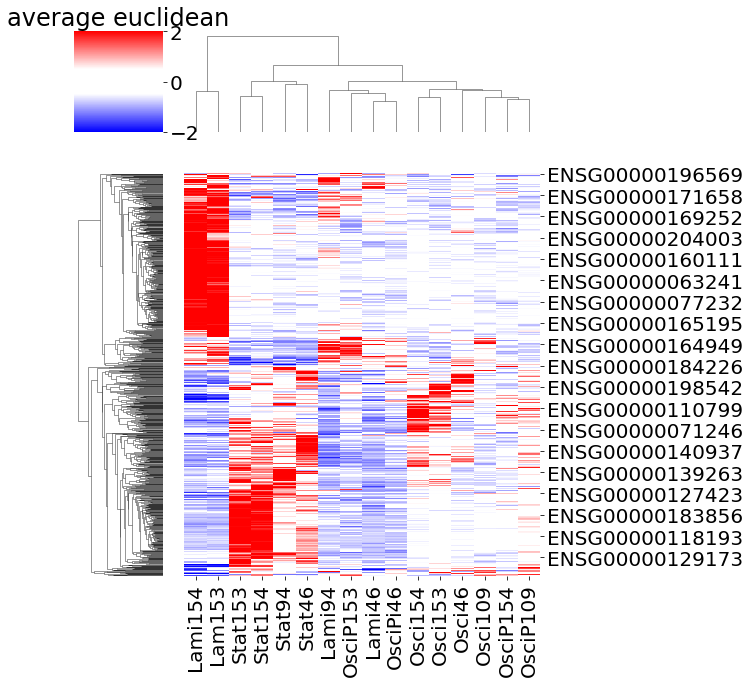

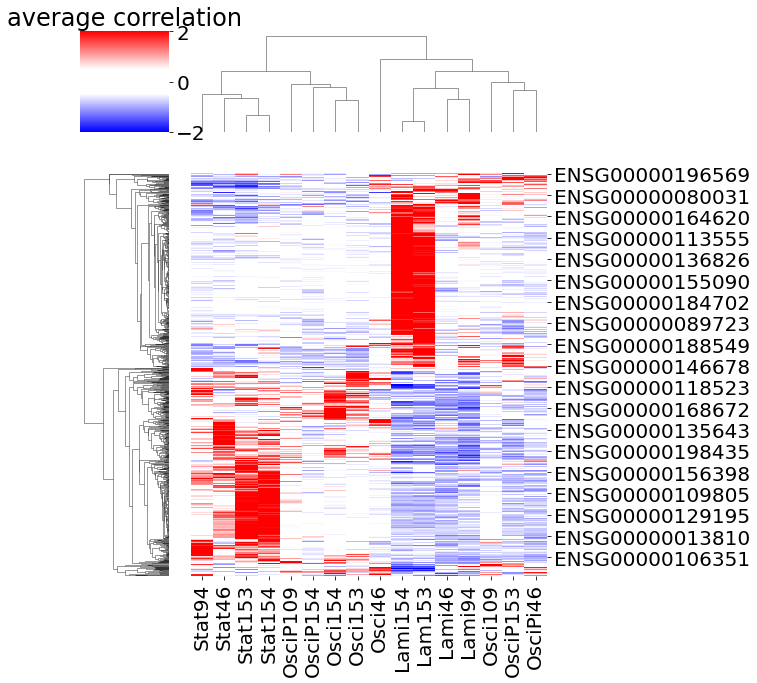

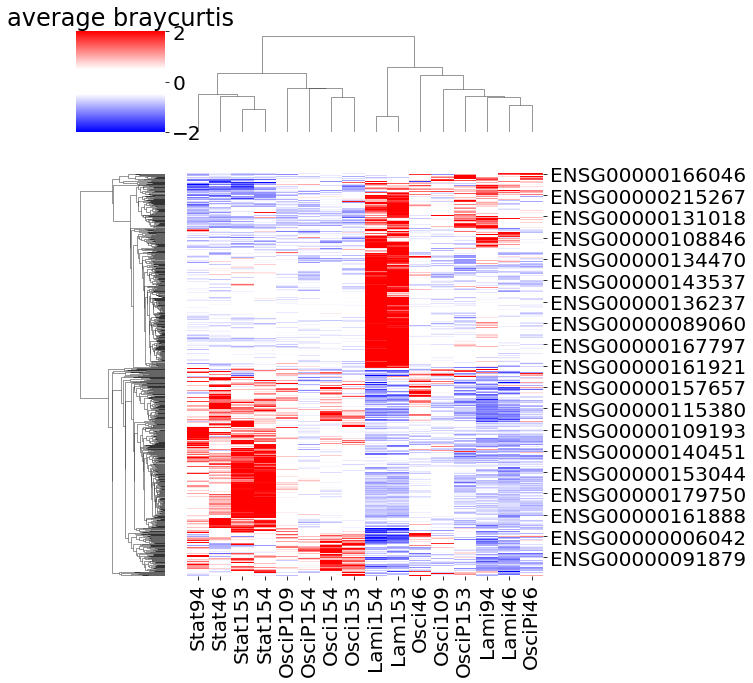

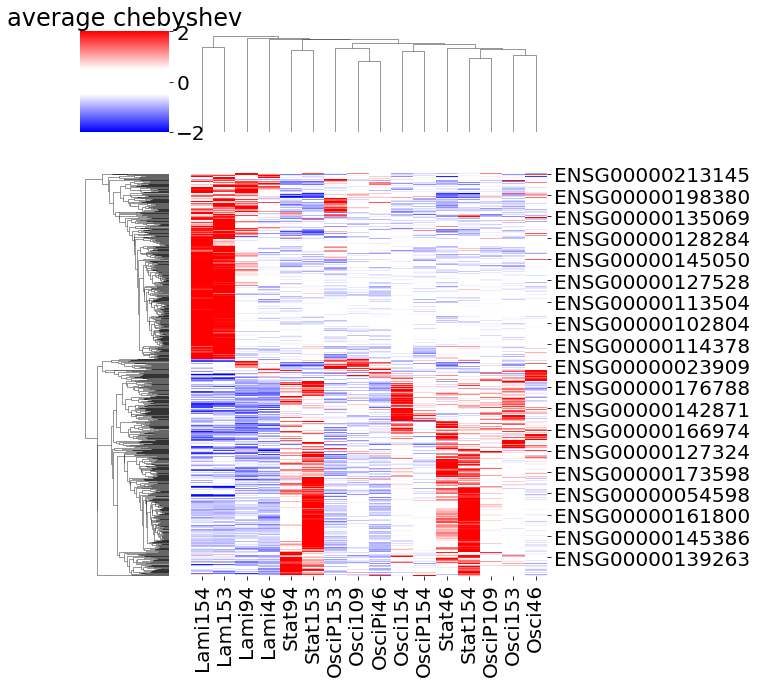

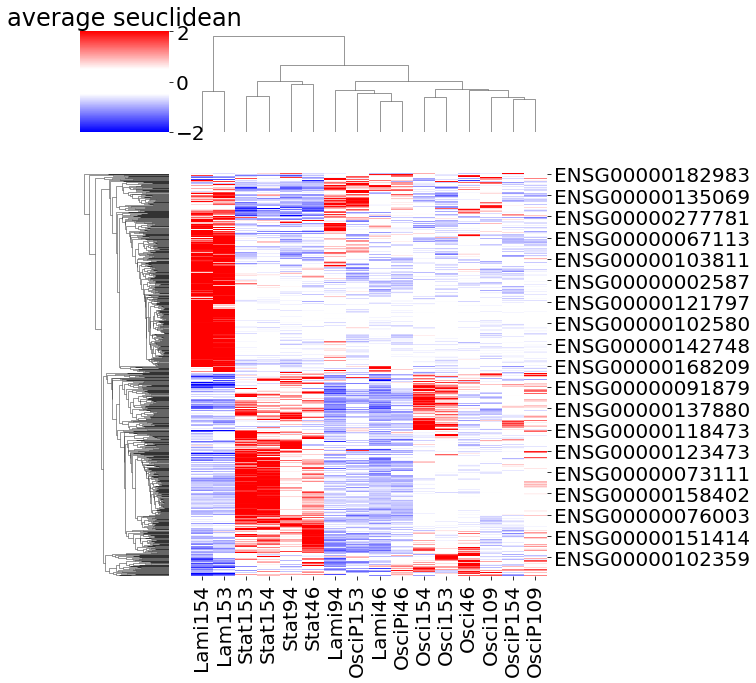

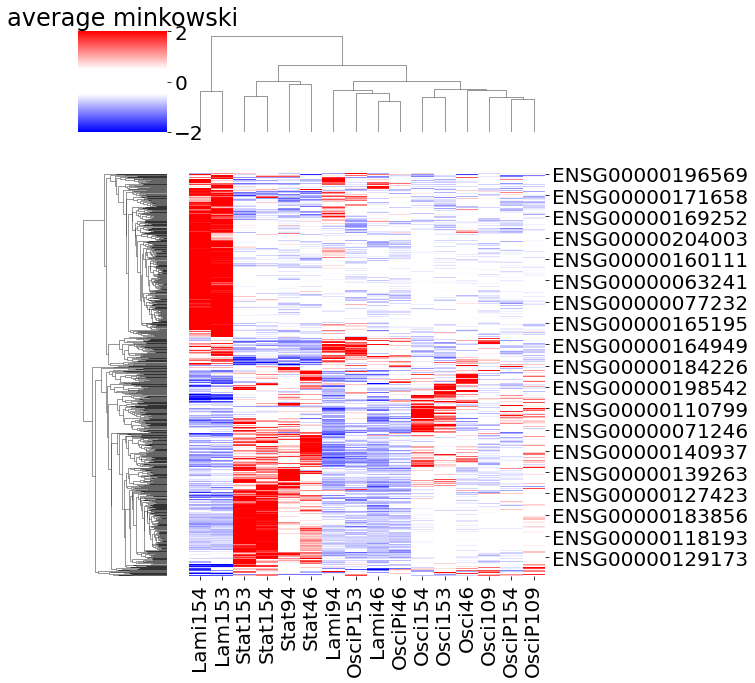

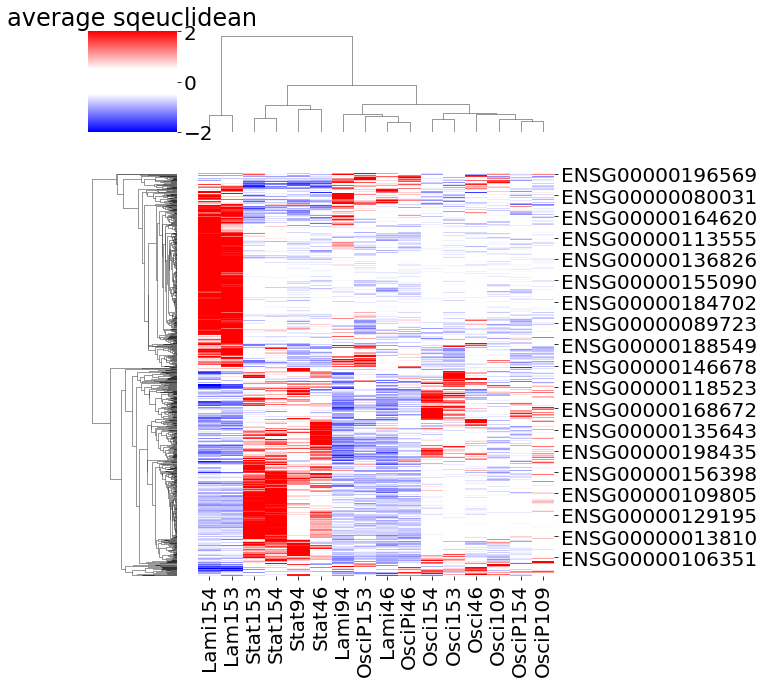

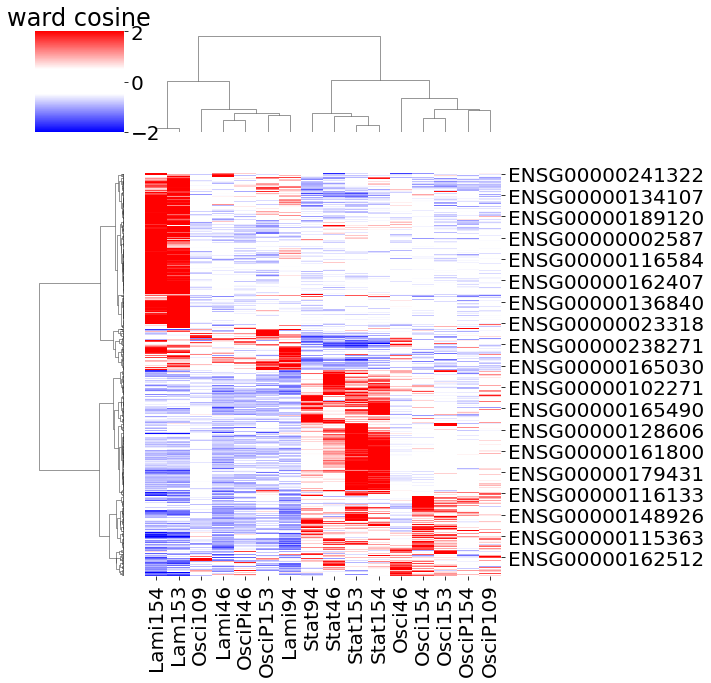

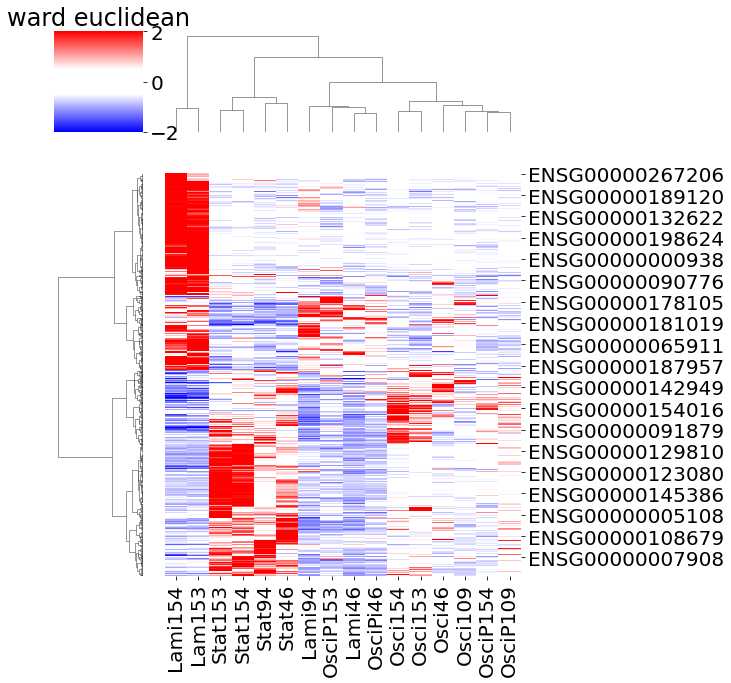

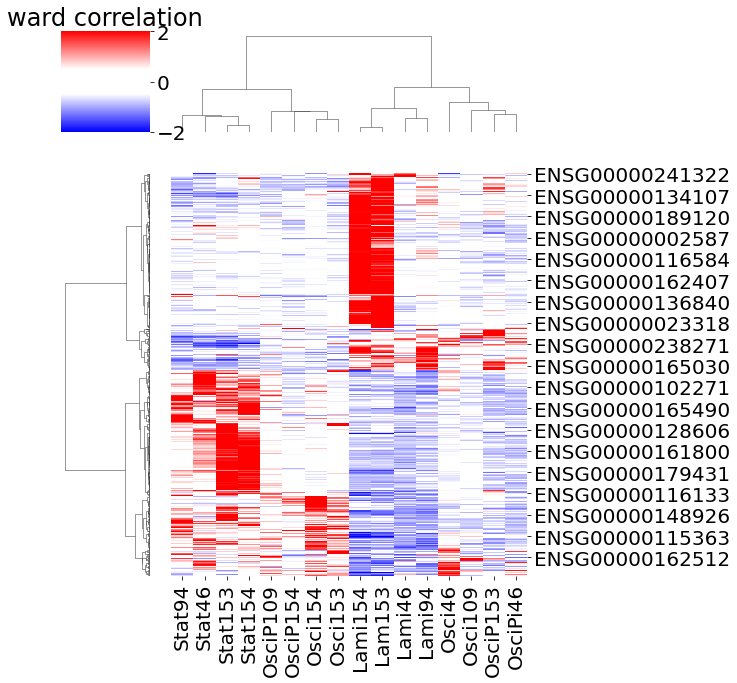

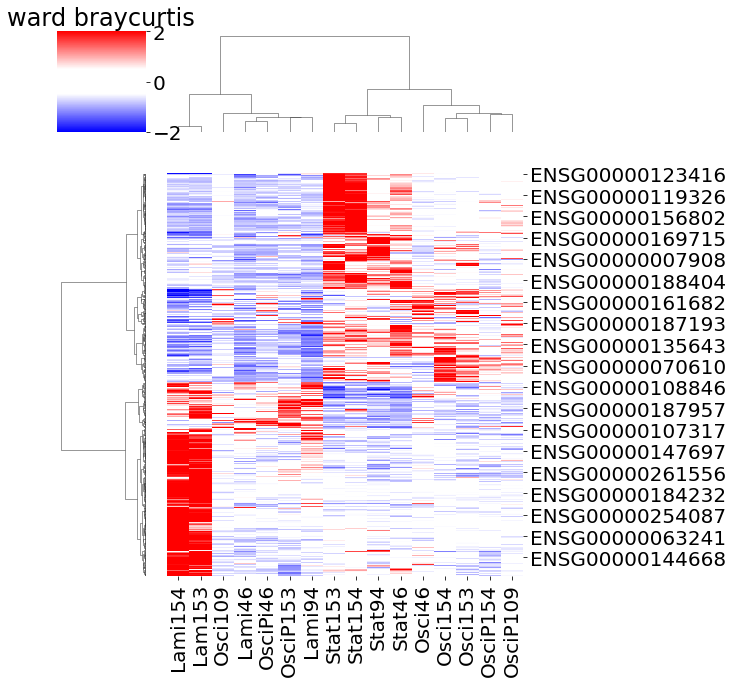

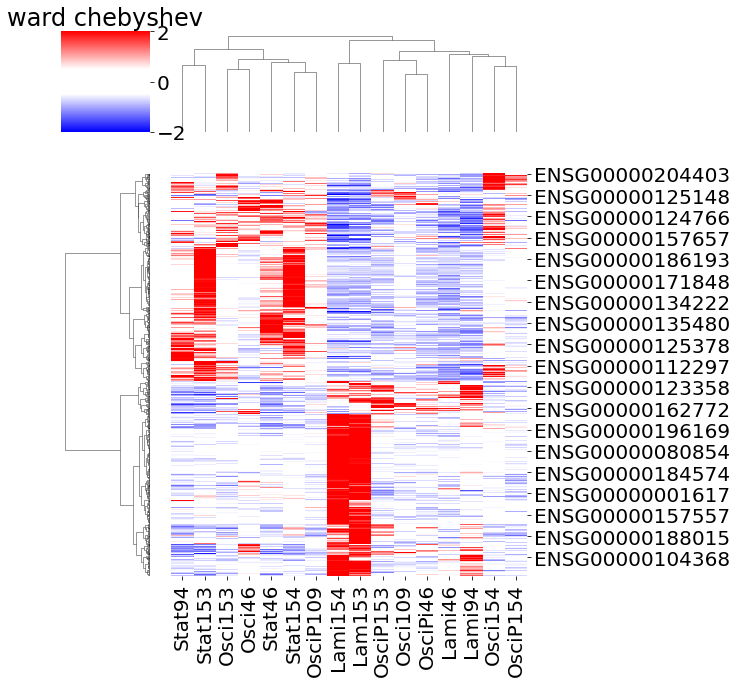

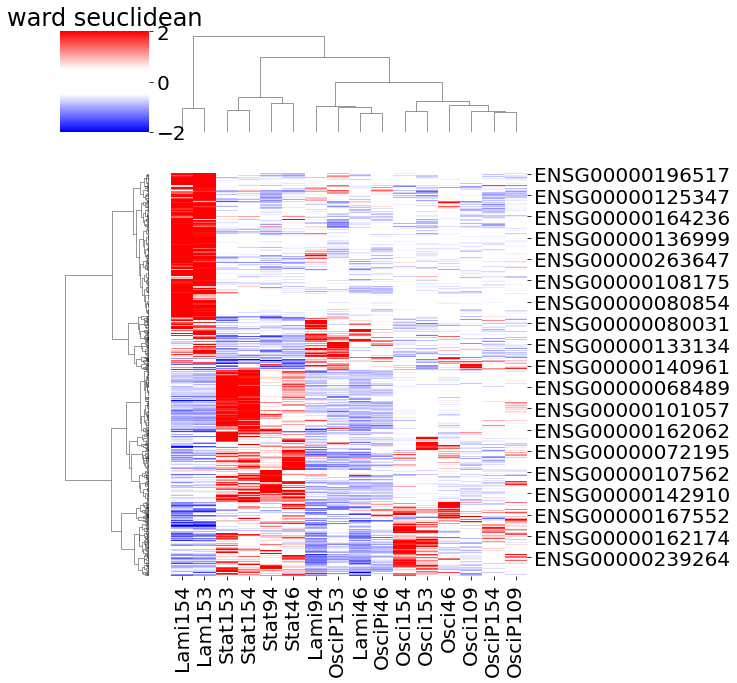

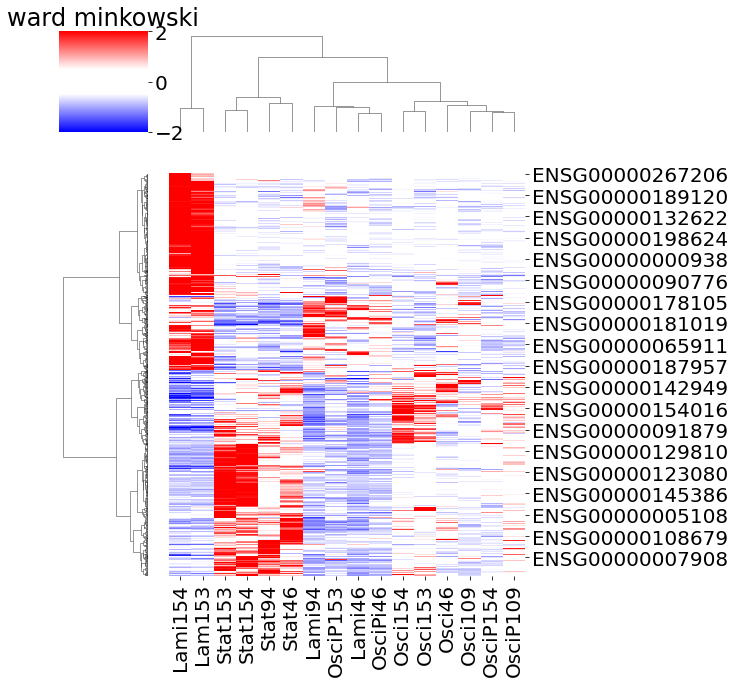

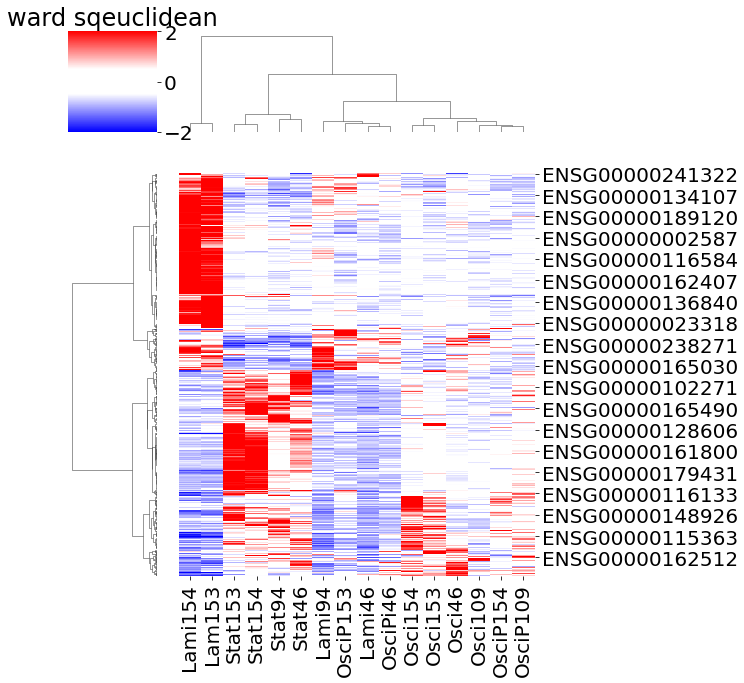

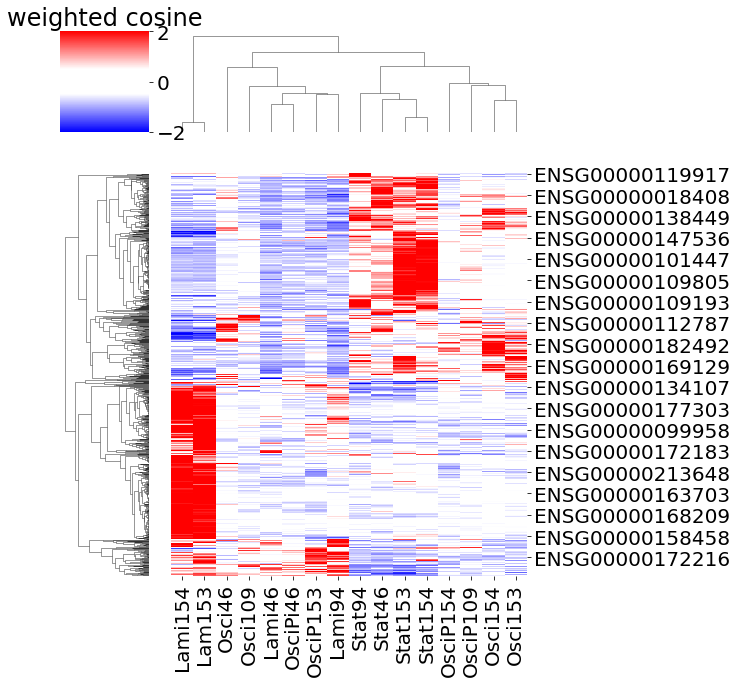

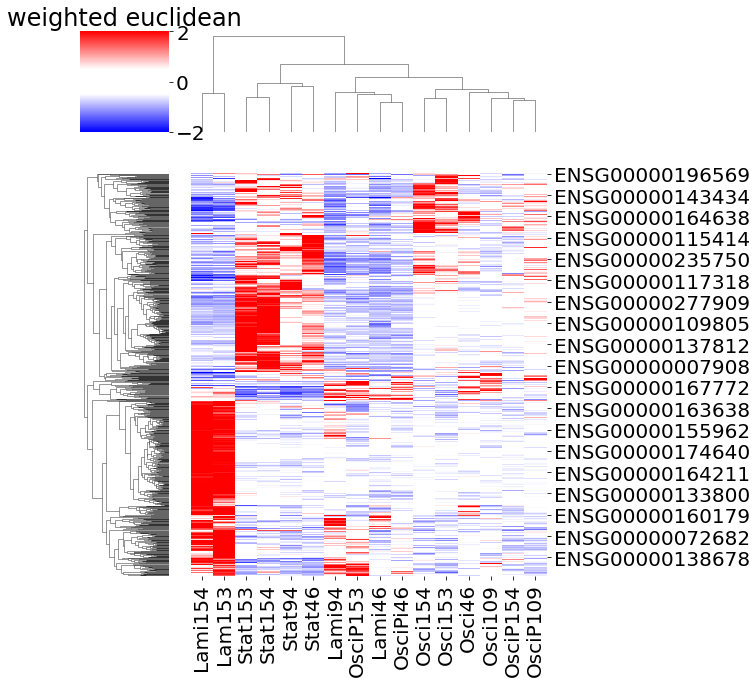

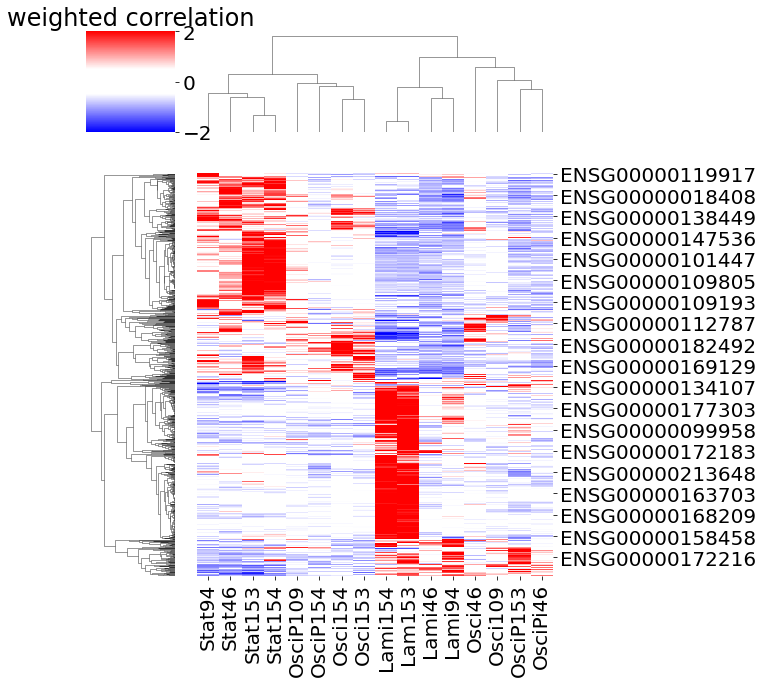

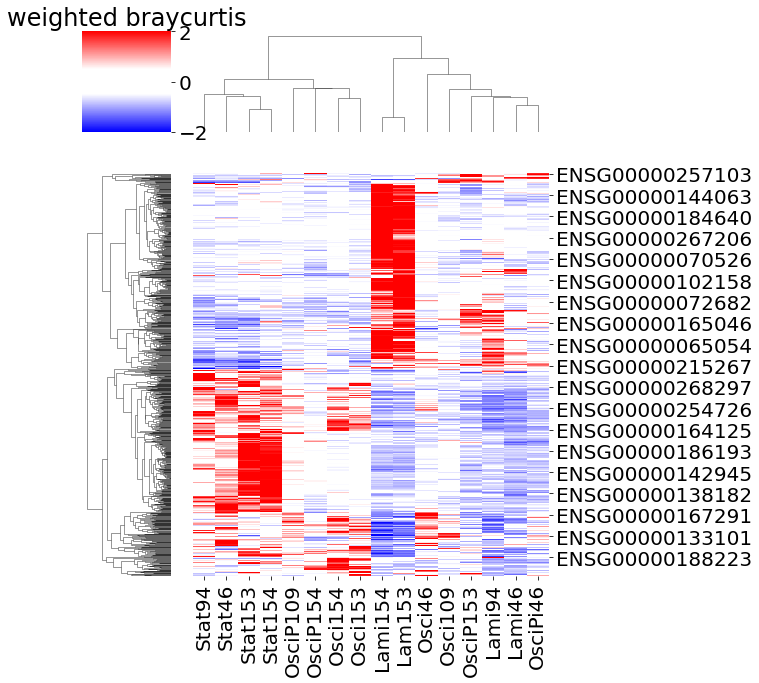

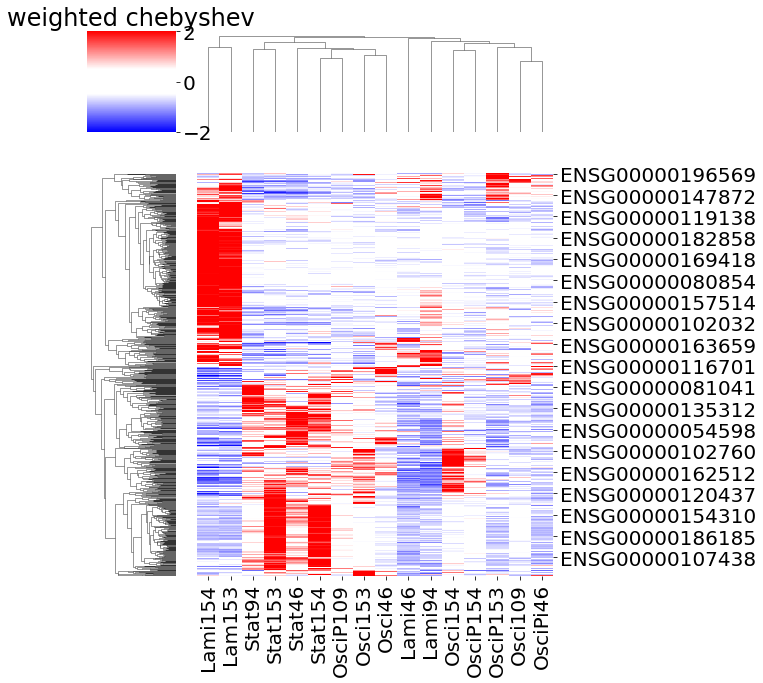

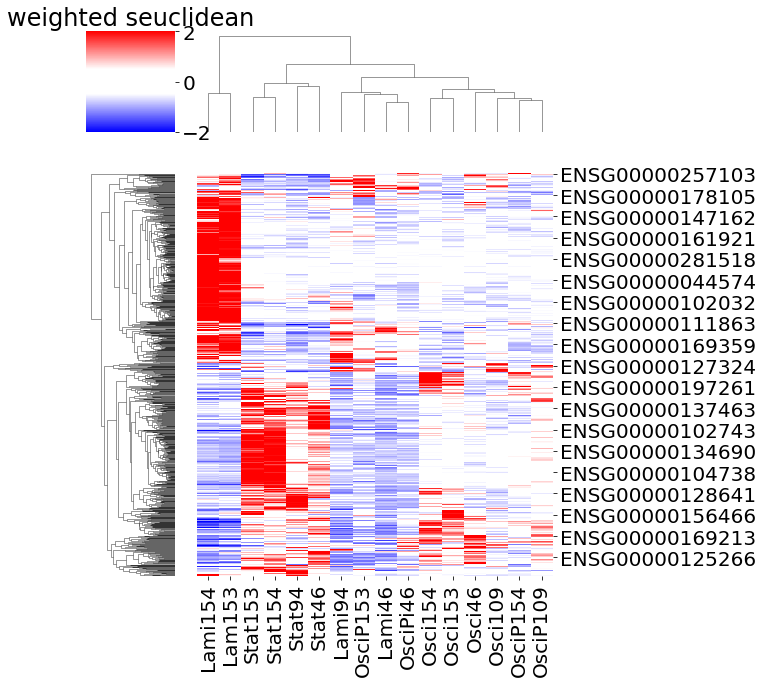

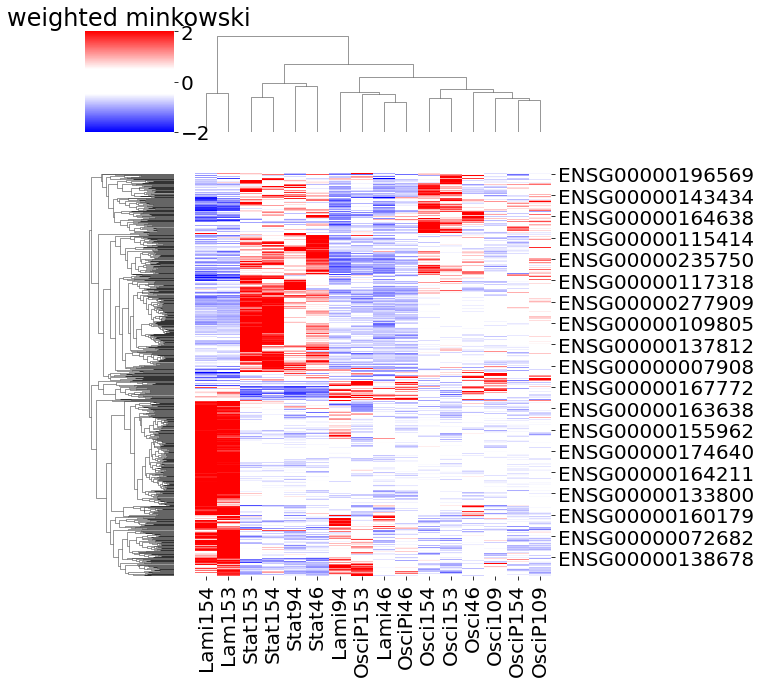

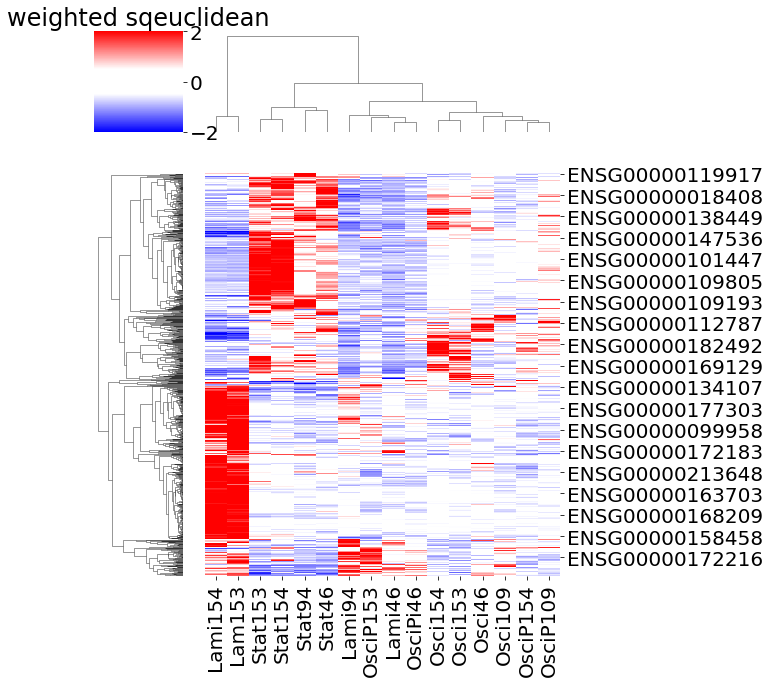

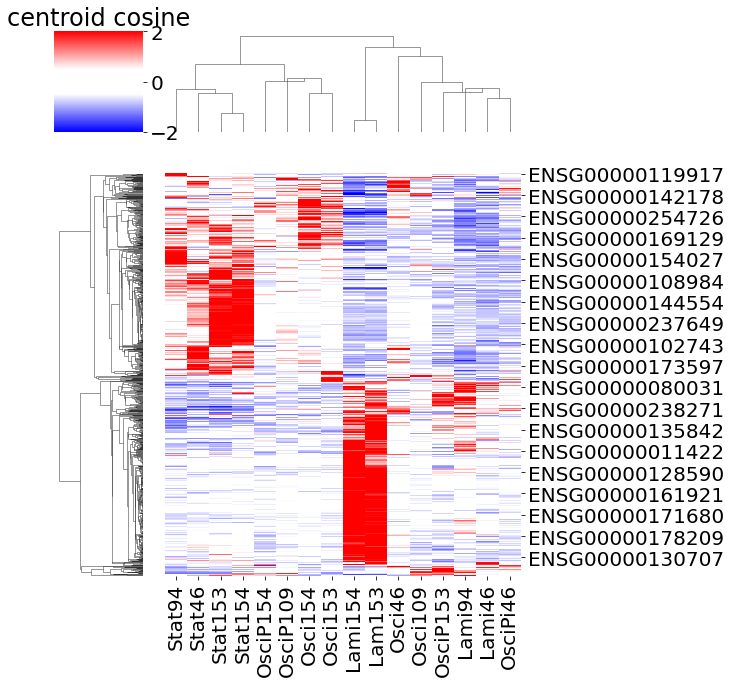

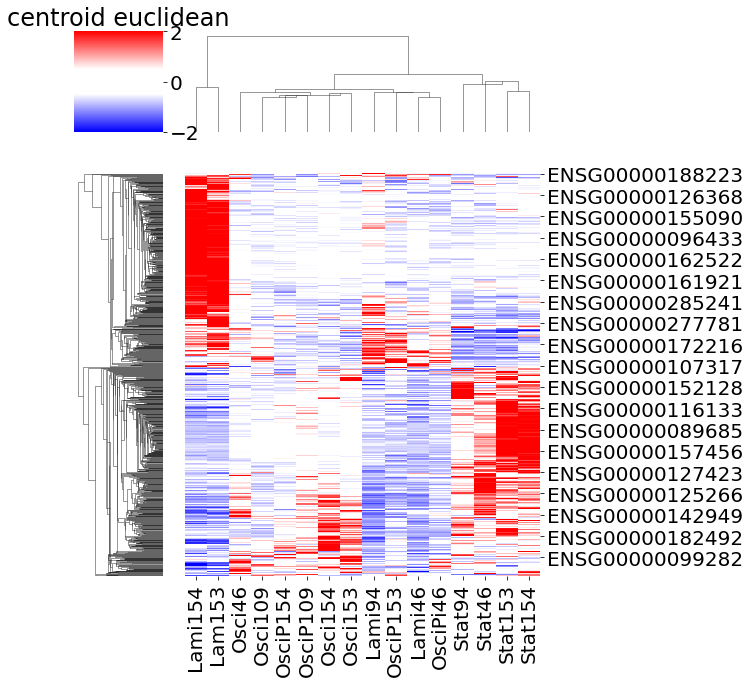

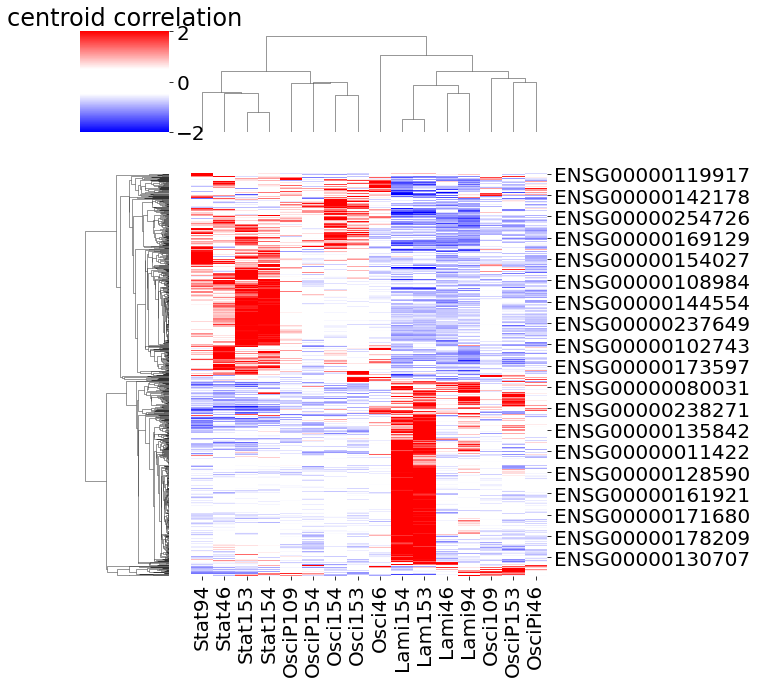

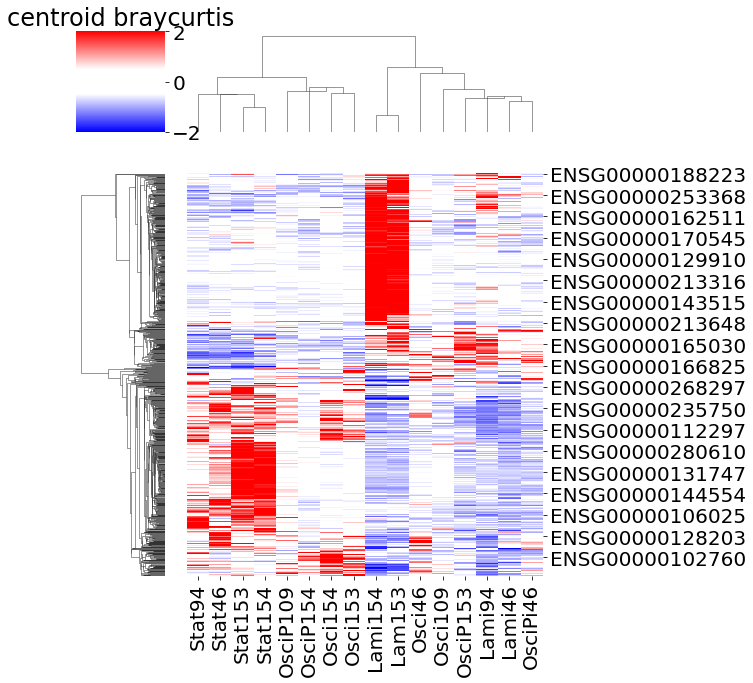

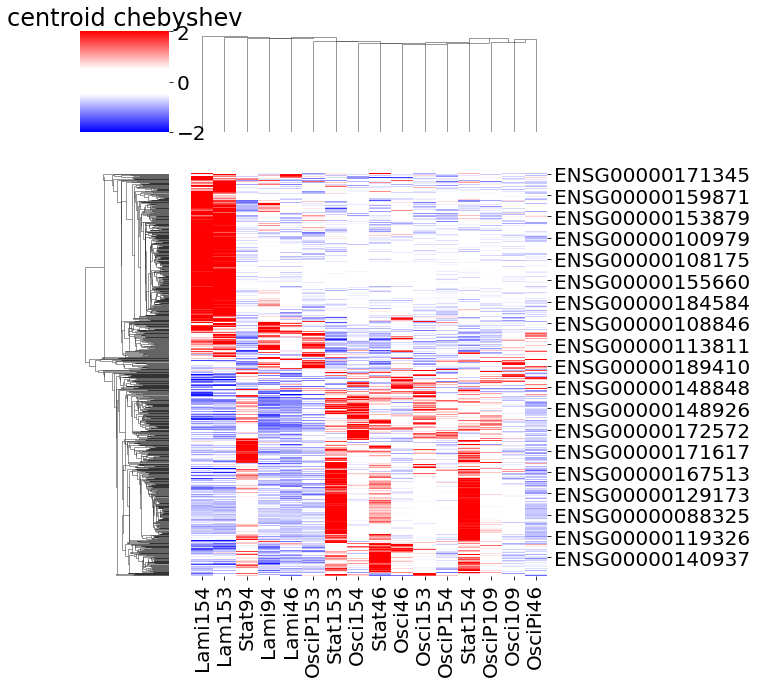

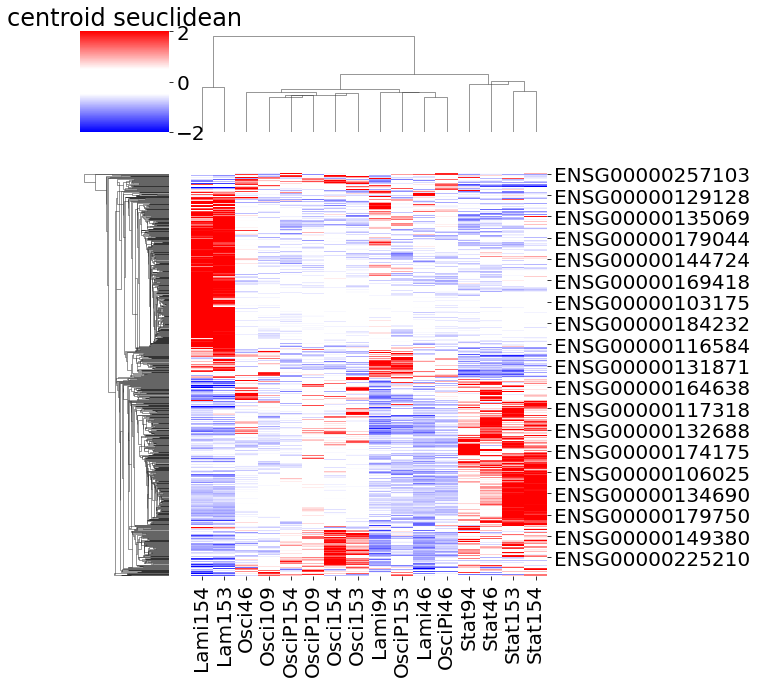

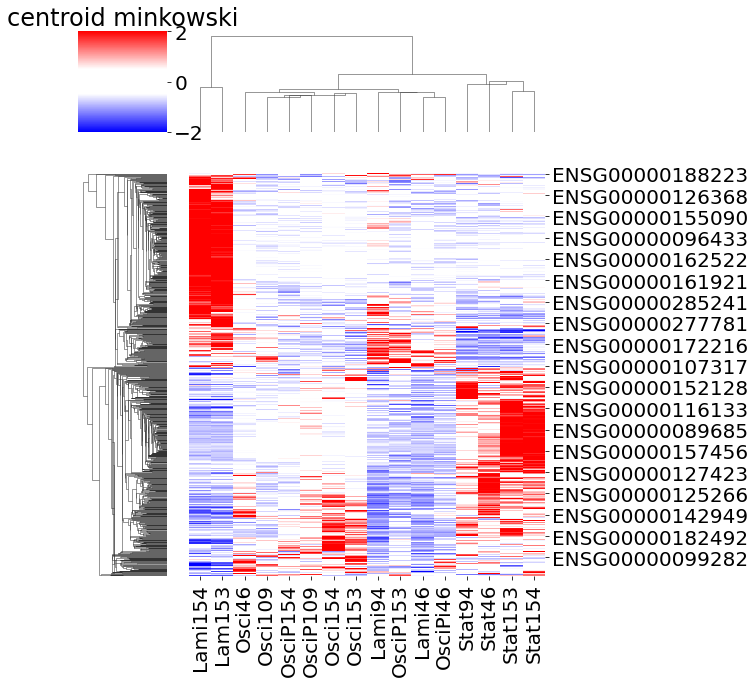

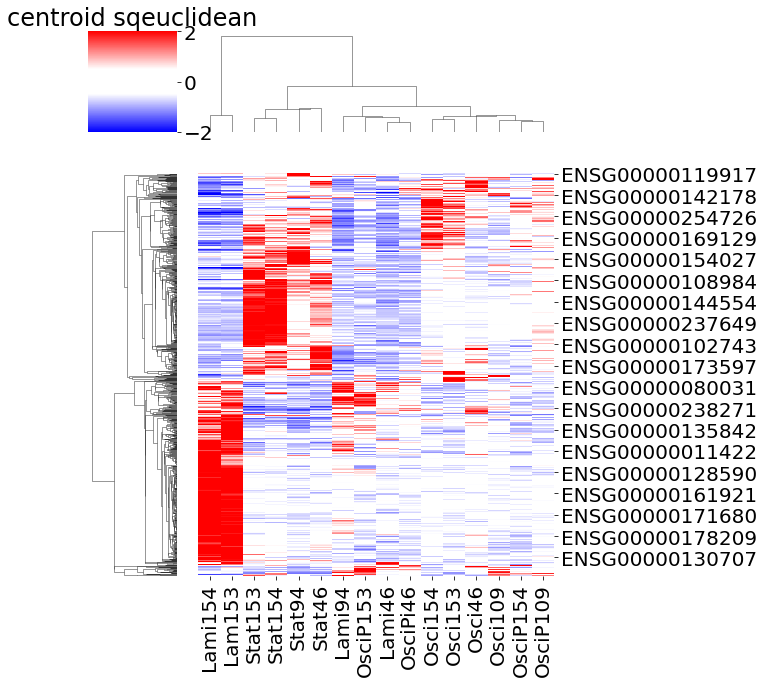

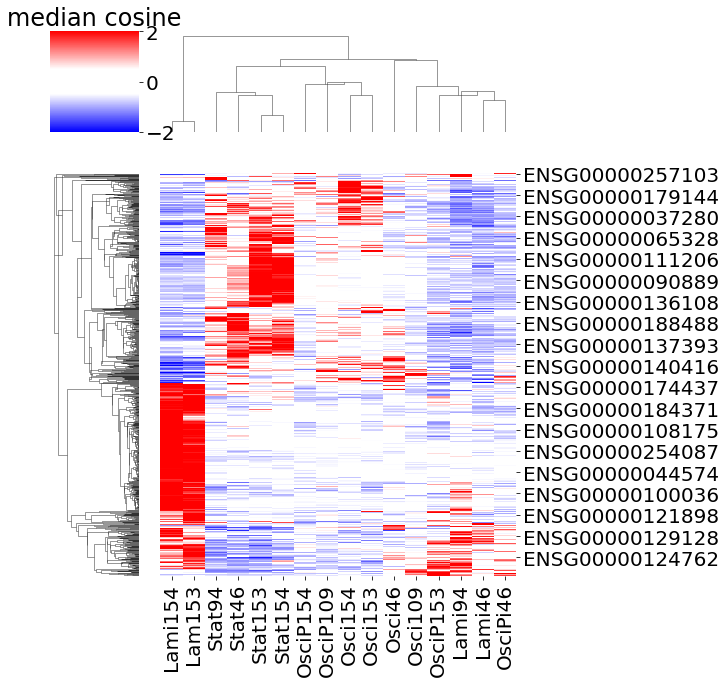

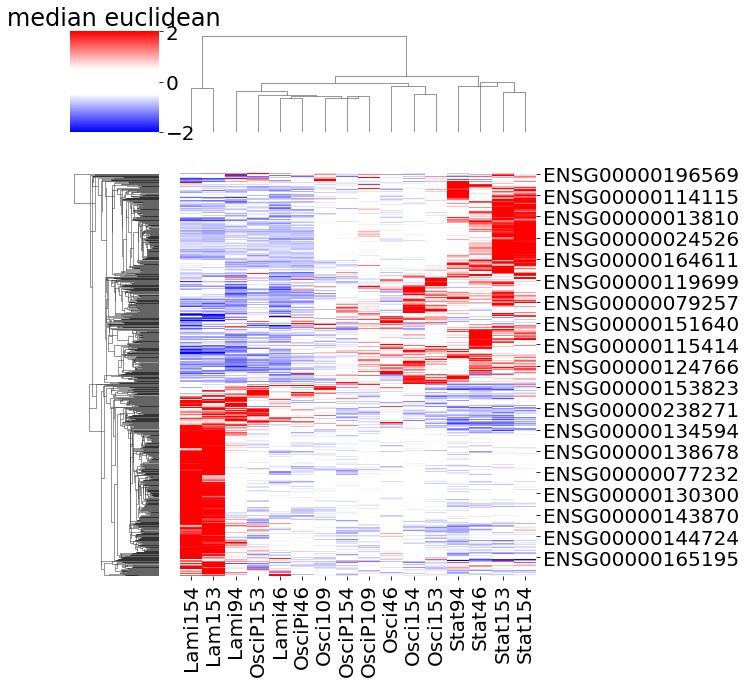

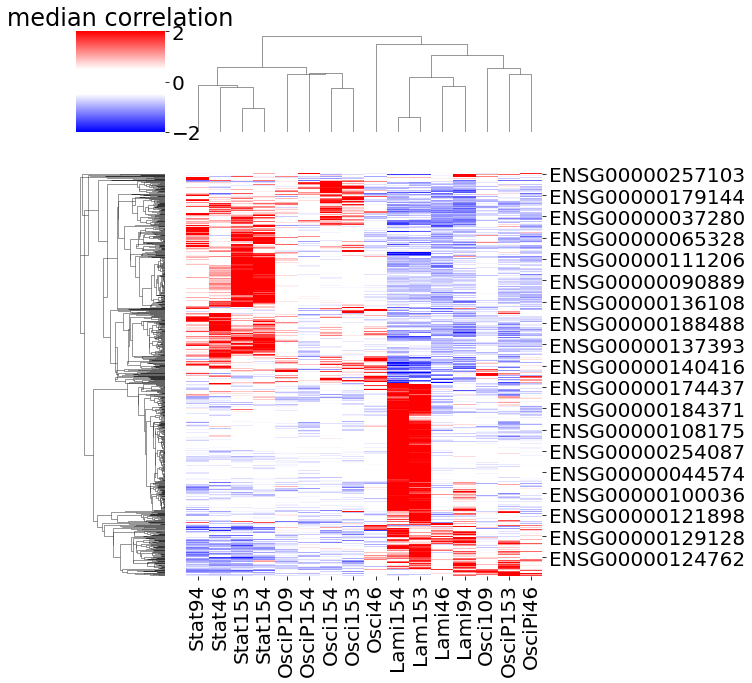

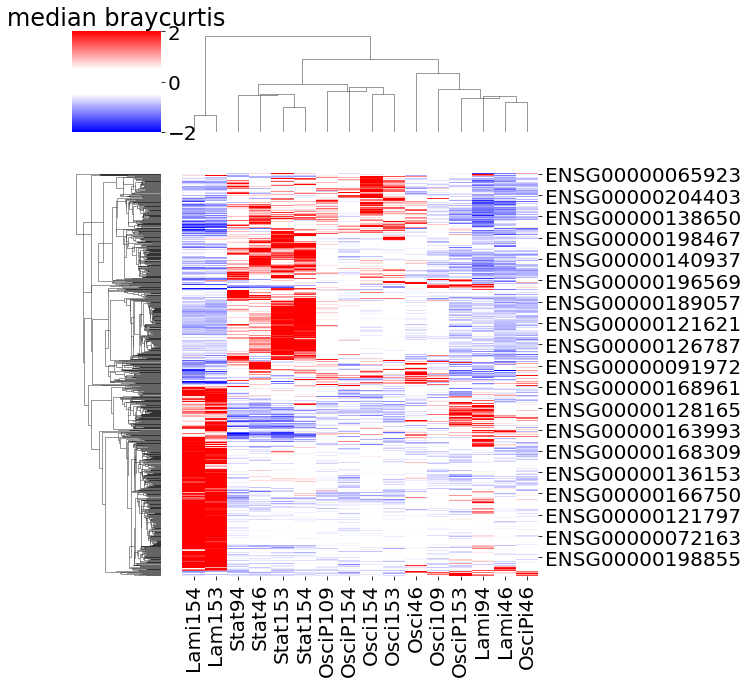

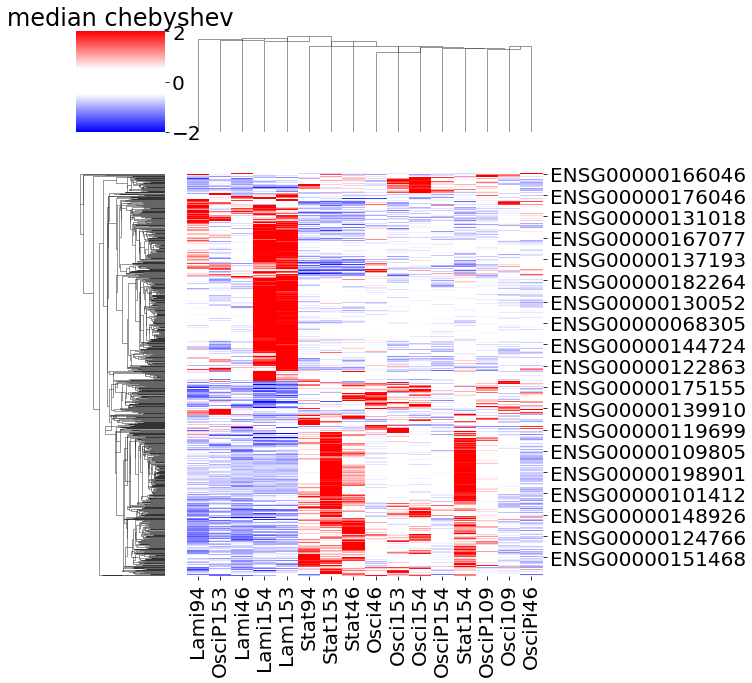

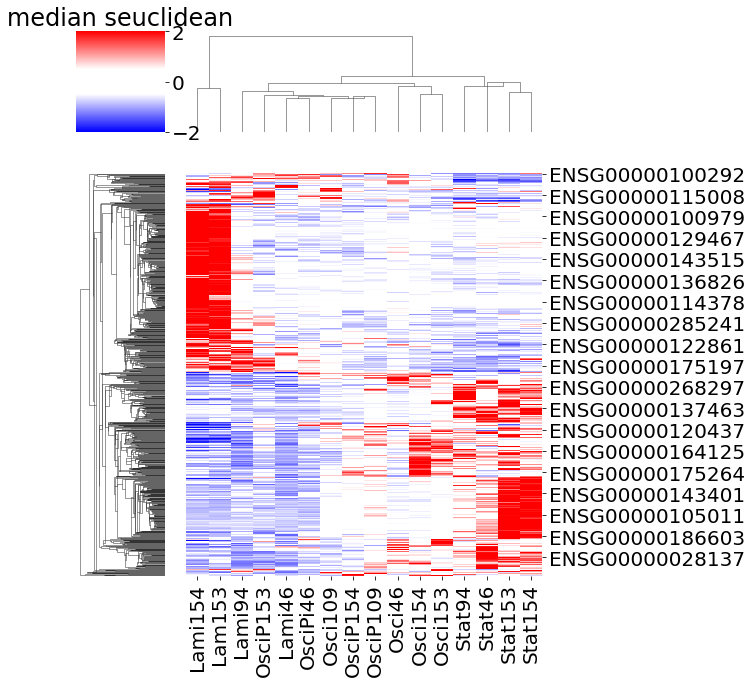

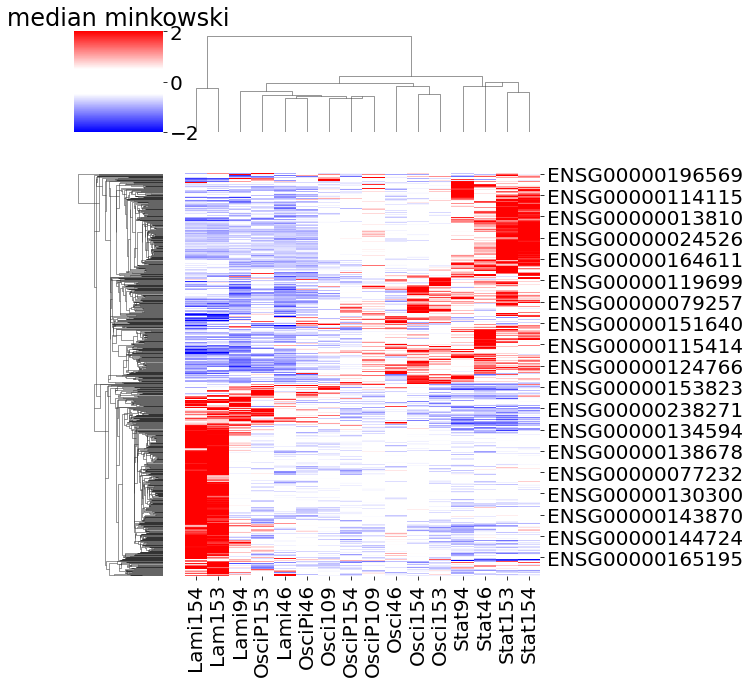

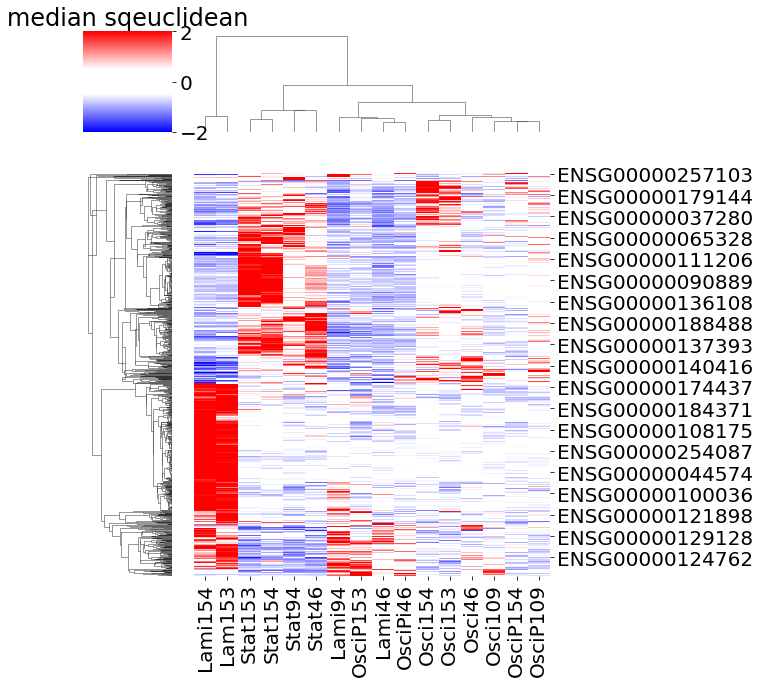

In [15]:
linkage_methods = ['complete', 'single', 'average', 'ward', 'weighted', 'centroid', 'median']
distance_metrics = ['cosine', 'euclidean', 'correlation', 'braycurtis', 'chebyshev', 'seuclidean', 'minkowski', 'sqeuclidean']

for linkage_method in linkage_methods:
    for distance_metric in distance_metrics:
        
        if linkage_method == 'single' and (distance_metric == 'chebyshev' or distance_metric == 'minkowski'):
            pass
        else:
    
            print('working with {} and {}...'.format(linkage_method, distance_metric))

            seaborn.clustermap(zscore_df, cmap=bwwr, method=linkage_method, metric=distance_metric, vmin=-2, vmax=2)

            matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
            matplotlib.pyplot.tight_layout()
            matplotlib.pyplot.savefig('figures/{}.{}.pdf'.format(linkage_method, distance_metric))